# TB1: Entrega Final

* Orrego Noriega, Jorge David (u201921734)

## Carga de dependencias

In [ ]:
!pip install streamlit pyngrok joblib scikit-learn
!npm install -g localtunnel

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧
changed 22 packages in 3s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧

## 1. Identificar el problema


In [ ]:
# Dataset: https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs

data = read_csv('spotify_songs.csv', delimiter=',')
print(data.head(5))

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

El dataset cuenta con 32833 filas y 23 columnas en total, de las cuales se incluyen variables tanto categóricas como numéricas. Para el análisis de las canciones, las variables más importantes del lado de las categóricas serían la playlist_genre y playlist_subgenre, mientras que por el lado de las numéricas todas representan alguna característica específica de una canción (por ejemplo, loudness expresa qué tan ruidosa es la canción y danceability qué tan bailable es).


En este caso, la variable objetivo será **playlist_genre**.

Dado que el caso de negocio necesita de un sistema de recomendación de canciones, se utilizará un **modelo de clasificación** que divida en clases las canciones con características similares que probablemente se asemejen más a las canciones favoritas del usuario.

## 2. Comprensión de los datos

In [ ]:
# Descripción de las variables numéricas
display(data.describe())

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [ ]:
# Descripción de las variables categóricas
display(data.describe(include='object'))

,track_id,track_name,track_artist,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre
count,32833,32828,32828,32833,32828,32833,32833,32833,32833,32833
unique,28356,23449,10692,22545,19743,4530,449,471,6,24
top,7BKLCZ1jbUBVqRi2FVlTVw,Poison,Martin Garrix,5L1xcowSxwzFUSJzvyMp48,Greatest Hits,2020-01-10,Indie Poptimism,4JkkvMpVl4lSioqQjeAL0q,edm,progressive electro house
freq,10,22,161,42,139,270,308,247,6043,1809


### Valores únicos y faltantes por columna

In [ ]:
# Verifica si hay valores nulos por columna
print("\nValores nulos por columna:")
display(data.isnull().sum())


Valores nulos por columna:


,0
track_id,0
track_name,5
track_artist,5
track_popularity,0
track_album_id,0
track_album_name,5
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


### Conteo de filas duplicadas

In [ ]:
# Detectar y contar las filas duplicadas
duplicate_rows = data.duplicated().sum()

print(f"Número de filas duplicadas: {duplicate_rows}")

# Visualización de filas duplicadas
if duplicate_rows > 0:
    print("\nEjemplo de filas duplicadas:")
    display(data[data.duplicated(keep=False)].head())

Número de filas duplicadas: 0


### Detección y conteo de outliers por columna

In [ ]:
# Identificar columnas numéricas
numerical_cols = data.select_dtypes(include=np.number).columns

# Calcular el IQR y la cantidad de outliers
outliers = {}
outlier_summary = {}

for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    col_outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    if not col_outliers.empty:
        outliers[col] = col_outliers[col]
        outlier_summary[col] = {
            'count': len(col_outliers),
            'percentage': (len(col_outliers) / len(data)) * 100
        }

# Visualizar los resultados
if outliers:
    print("\nOutliers detectados:")
    for col, values in outliers.items():
        print(f"\nColumna '{col}':")
        display(values)
    print("\nResumen:")
    for col, summary in outlier_summary.items():
        print(f"'{col}': Count = {summary['count']}, Percentage = {summary['percentage']:.2f}%")


Outliers detectados:

Columna 'danceability':


,danceability
886,0.206
900,0.225
1258,0.258
1446,0.258
1517,0.225
...,...
30653,0.262
31093,0.264
31328,0.245
32374,0.264



Columna 'energy':


,energy
1090,0.1720
1116,0.1820
1121,0.1120
1272,0.1470
1361,0.1860
...,...
26757,0.1500
26788,0.0474
26789,0.1710
27549,0.1060



Columna 'loudness':


,loudness
689,-14.454
839,-14.916
845,-13.968
1081,-14.520
1090,-20.700
...,...
31688,-14.377
31690,-14.065
31703,-16.416
32641,-13.606



Columna 'speechiness':


,speechiness
43,0.295
82,0.486
121,0.350
190,0.270
208,0.321
...,...
32675,0.302
32680,0.285
32737,0.318
32751,0.292



Columna 'acousticness':


,acousticness
387,0.617
403,0.693
475,0.656
577,0.798
689,0.902
...,...
31629,0.788
31982,0.713
32013,0.681
32044,0.837



Columna 'instrumentalness':


,instrumentalness
20,0.0198
21,0.0810
43,0.3300
44,0.0271
45,0.7460
...,...
32817,0.5060
32819,0.9320
32823,0.2190
32831,0.1270



Columna 'liveness':


,liveness
8,0.637
97,0.577
129,0.544
177,0.499
181,0.704
...,...
32731,0.699
32795,0.547
32810,0.534
32827,0.572



Columna 'tempo':


,tempo
396,187.981
413,200.012
436,190.050
542,201.948
669,200.000
...,...
32377,192.118
32402,194.997
32546,194.956
32583,194.050



Columna 'duration_ms':


,duration_ms
502,360960
589,353893
837,458058
900,452389
1004,450000
...,...
32807,379261
32814,393750
32819,377930
32829,353120



Resumen:
'danceability': Count = 291, Percentage = 0.89%
'energy': Count = 277, Percentage = 0.84%
'loudness': Count = 1021, Percentage = 3.11%
'speechiness': Count = 3176, Percentage = 9.67%
'acousticness': Count = 2205, Percentage = 6.72%
'instrumentalness': Count = 7030, Percentage = 21.41%
'liveness': Count = 1843, Percentage = 5.61%
'tempo': Count = 571, Percentage = 1.74%
'duration_ms': Count = 1387, Percentage = 4.22%


### Visualización de Datos

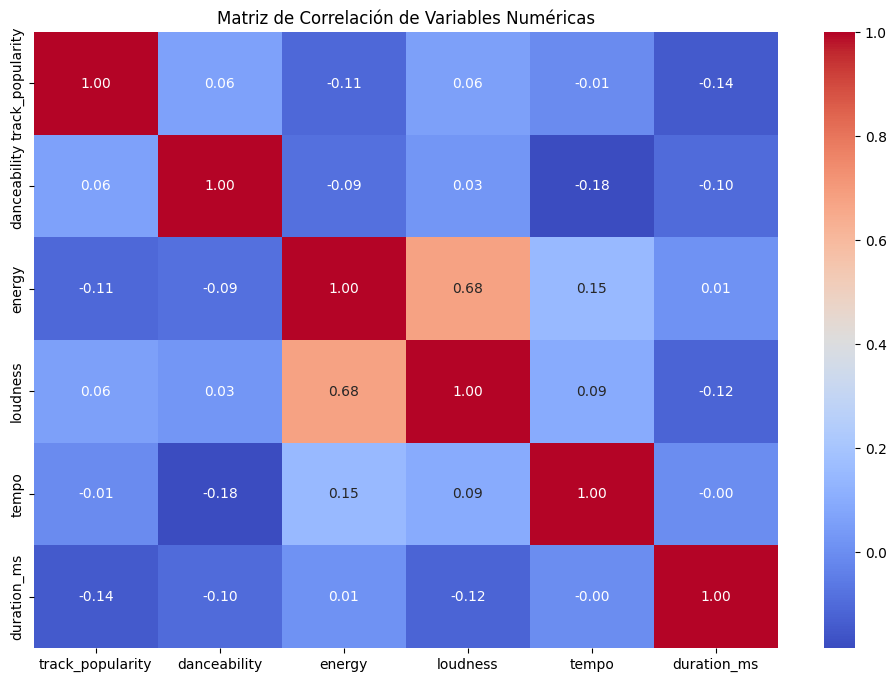

In [ ]:
# Calcular la matriz de correlacion entre las variables numericas
numerical_cols= ['track_popularity', 'danceability', 'energy', 'loudness', 'tempo', 'duration_ms']
correlation_matrix = data[numerical_cols].corr()

# Mostrar la matriz de correlacion usando un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

En esta matriz de correlación se pueden visualizar las relaciones entre todas las variables numéricas. Se resalta la relación entre las variables energy y loudness, ya que el coeficiente de correlación es positivo (0.68) y por eso se confirma que mientras más enérgica sea una canción, más ruidosa será. Las demás relaciones entre las variables no son muy significativas dado que su coeficiente de correlación es muy cercano al 0, por lo que no existe una correlación fuerte o es casi nula.

/tmp/ipython-input-1095155266.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularity_by_genre.index, y=popularity_by_genre.values, palette='viridis')


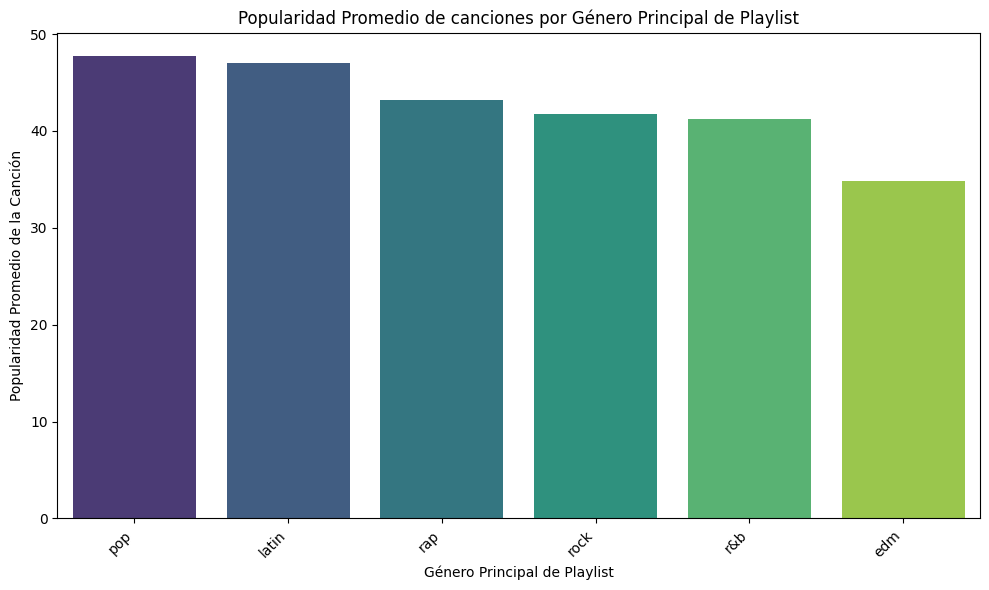

In [ ]:
# Relación entre las variables playlist_genre and track_popularity:
popularity_by_genre = data.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=popularity_by_genre.index, y=popularity_by_genre.values, palette='viridis')
plt.title('Popularidad Promedio de canciones por Género Principal de Playlist')
plt.xlabel('Género Principal de Playlist')
plt.ylabel('Popularidad Promedio de la Canción')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En el gráfico de barras se puede ver el valor promedio de la popularidad de una canción según el género principal de la playlist a la que pertenece, siendo el valor más alto el mejor. Se puede deducir que las canciones más populares pertenecen a los géneros del pop, el latin y el rap. Por otra parte, las canciones menos populares por género principal son el rock, r&b y edm.

/tmp/ipython-input-774348910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularity_by_subgenre.index, y=popularity_by_subgenre.values, palette='viridis')


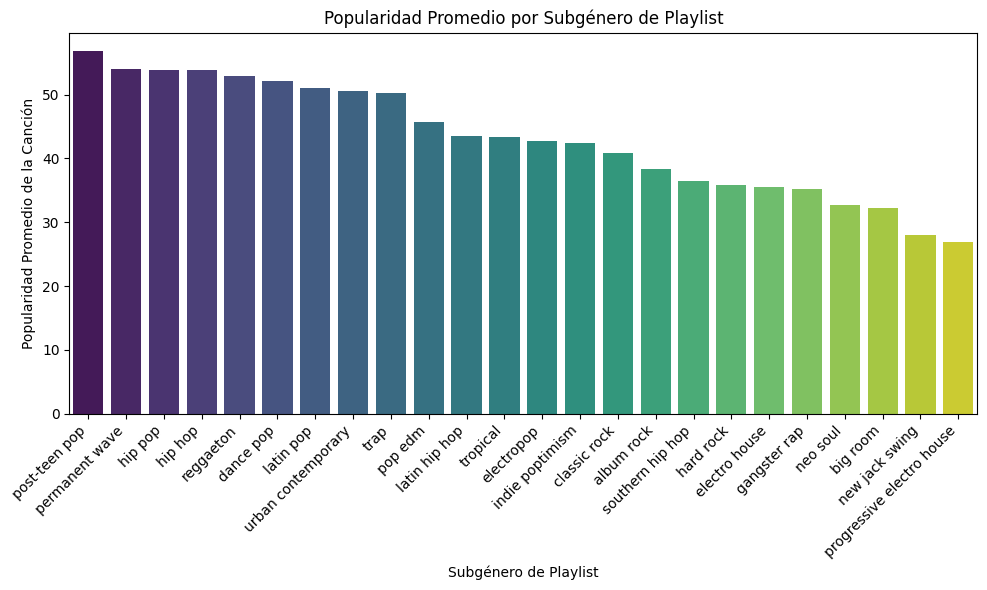

In [ ]:
# Relación entre las variables playlist_subgenre and track_popularity:
popularity_by_subgenre = data.groupby('playlist_subgenre')['track_popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=popularity_by_subgenre.index, y=popularity_by_subgenre.values, palette='viridis')
plt.title('Popularidad Promedio por Subgénero de Playlist')
plt.xlabel('Subgénero de Playlist')
plt.ylabel('Popularidad Promedio de la Canción')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Con respecto a los subgéneros, se puede deducir que los que tienen las canciones más populares en promedio son post-teen pop, permanent wave y hip pop. Por otra parte, los menos populares son big room, new jack swing y progressive electro house.

## 3. Preparación de los datos

### Análisis de transformación (variables numéricas)

Se analizará qué tipo de transformación de escalado se usarán para las variables track_popularity, loudness, tempo y duration_ms. En este caso, key no cuenta como variable numérica ya que cada valor numérico representa una nota musical.

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
track_popularity,32833.0,42.477081,24.984074,0.000000,24.0000,45.000000,62.00000,100.000
danceability,32833.0,0.654850,0.145085,0.000000,0.5630,0.672000,0.76100,0.983
energy,32833.0,0.698619,0.180910,0.000175,0.5810,0.721000,0.84000,1.000
key,32833.0,5.374471,3.611657,0.000000,2.0000,6.000000,9.00000,11.000
loudness,32833.0,-6.719499,2.988436,-46.448000,-8.1710,-6.166000,-4.64500,1.275
mode,32833.0,0.565711,0.495671,0.000000,0.0000,1.000000,1.00000,1.000
speechiness,32833.0,0.107068,0.101314,0.000000,0.0410,0.062500,0.13200,0.918
acousticness,32833.0,0.175334,0.219633,0.000000,0.0151,0.080400,0.25500,0.994
instrumentalness,32833.0,0.084747,0.224230,0.000000,0.0000,0.000016,0.00483,0.994
liveness,32833.0,0.190176,0.154317,0.000000,0.0927,0.127000,0.24800,0.996


In [ ]:
features = data[['track_popularity','loudness','tempo','duration_ms']]

# Se utiliza el StandardScaler (Normalización Z-score)
scaler = StandardScaler()
normalized = scaler.fit_transform(features)

normalized_df = pd.DataFrame(normalized, columns=features.columns)
normalized_df.head()

,track_popularity,loudness,tempo,duration_ms
0,0.941531,1.367123,0.042927,-0.518874
1,0.981557,0.585766,-0.777198,-1.056268
2,1.101635,1.100090,0.116227,-0.822017
3,0.701374,0.984309,0.039953,-0.947750
4,1.061609,0.685151,0.115037,-0.614172


In [ ]:
# Se utiliza el MinMaxScaler
minmax = MinMaxScaler()
reescalado = minmax.fit_transform(features)

reescalado = pd.DataFrame(reescalado, columns=features.columns)
reescalado.head()

,track_popularity,loudness,tempo,duration_ms
0,0.66,0.918090,0.509673,0.371254
1,0.67,0.869162,0.417524,0.308674
2,0.70,0.901368,0.517908,0.335953
3,0.60,0.894118,0.509338,0.321311
4,0.69,0.875385,0.517775,0.360156


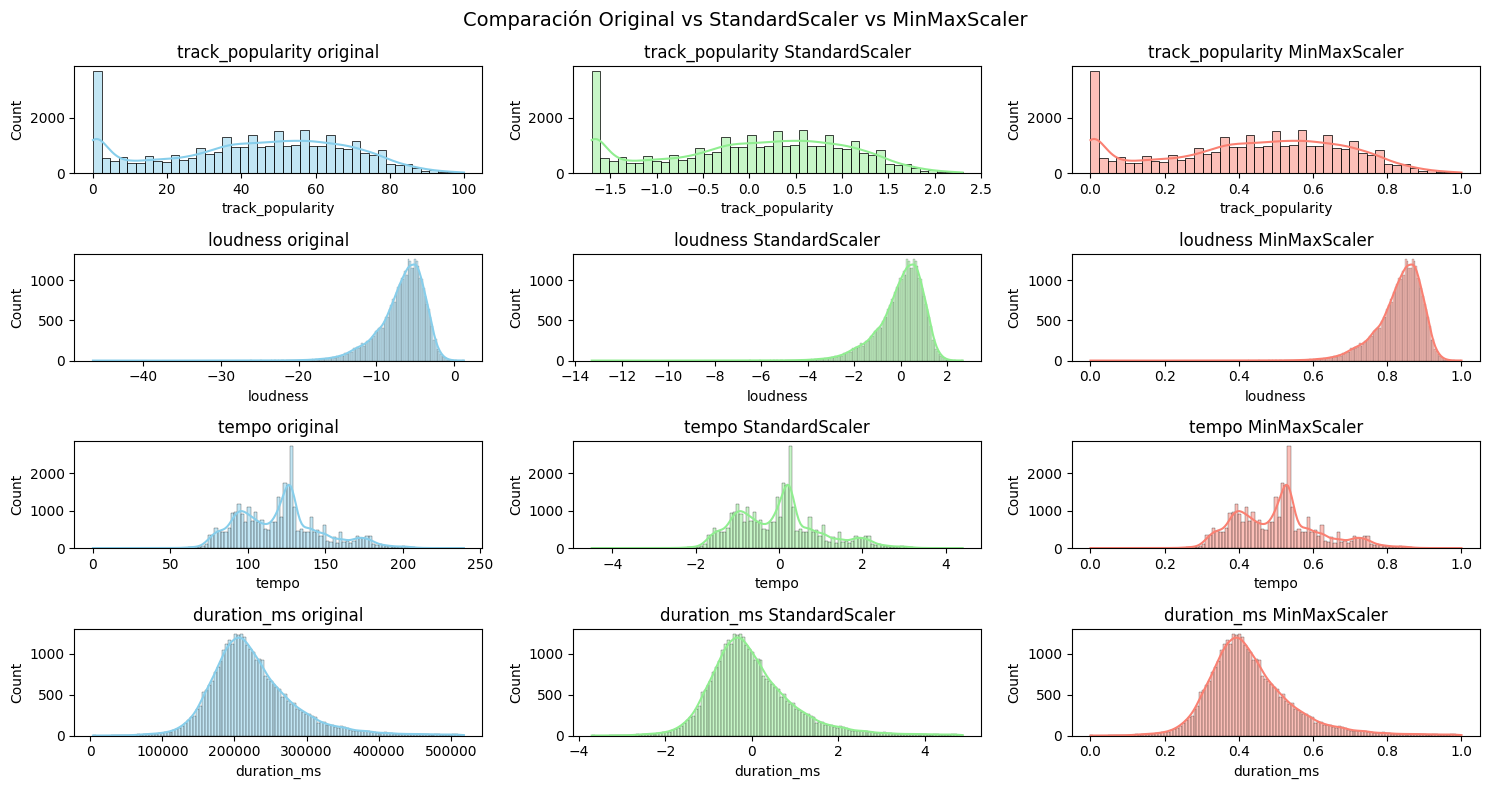

In [ ]:
# Se grafican los resultados obtenidos
fig, axes = plt.subplots(4, 3, figsize=(15, 8))

fig.suptitle('Comparación Original vs StandardScaler vs MinMaxScaler', fontsize=14)

vars_ = features.columns

for i, col in enumerate(vars_):
    # Original
    sns.histplot(features[col], kde=True, ax=axes[i,0], color='skyblue')
    axes[i,0].set_title(f'{col} original')

    # StandardScaler
    sns.histplot(normalized_df[col], kde=True, ax=axes[i,1], color='lightgreen')
    axes[i,1].set_title(f'{col} StandardScaler')

    # MinMaxScaler
    sns.histplot(reescalado[col], kde=True, ax=axes[i,2], color='salmon')
    axes[i,2].set_title(f'{col} MinMaxScaler')

plt.tight_layout()
plt.show()

En este caso en específico, se utilizará el MinMaxScaler para la transformación por la definición del rango de valores entre el 0 y 1 ya que este rango también es utilizado por otras variables del dataset y se desea mantener una uniformidad con las escalas de todas las variables numéricas.

### Preparación de datos para el modelado

In [ ]:
# Preparar datos (X: características, y: etiquetas)

# Definir las características numéricas para X
numerical_features = ['track_popularity', 'danceability', 'energy', 'loudness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration_ms']

X = data[numerical_features]

# Definir la variable objetivo y (usando playlist_genre como ejemplo para clasificación)
y = data['playlist_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado obligatorio para k-NN y SVM
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Modelado

### Implementación de los modelos

Modelos a evaluar:
* KNN (K-Nearest-Neighbors)
* Máquinas de Soporte Vectorial (SVM)
* Random Forest

In [ ]:
# KNN (K-Nearest-Neighbors)

# Crear y entrenar modelo
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

# Predicciones
predictions = model.predict(X_test_scaled)
accuracy = model.score(X_test_scaled, y_test)
print(f"Exactitud: {accuracy:.2f}")

# Reporte de clasificación
print("\nReporte de Clasificación (KNN):")
print(classification_report(y_test, predictions))

# Calcular AUC-ROC para multiclase
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
y_pred_proba = model.predict_proba(X_test_scaled)
roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, average='weighted', multi_class='ovr')
print(f"AUC-ROC ponderado (KNN): {roc_auc:.2f}")

Exactitud: 0.47

Reporte de Clasificación (KNN):
              precision    recall  f1-score   support

         edm       0.52      0.69      0.59      1218
       latin       0.37      0.43      0.40      1033
         pop       0.30      0.30      0.30      1081
         r&b       0.40      0.38      0.39      1031
         rap       0.59      0.44      0.51      1168
        rock       0.66      0.54      0.59      1036

    accuracy                           0.47      6567
   macro avg       0.47      0.46      0.46      6567
weighted avg       0.48      0.47      0.47      6567

AUC-ROC ponderado (KNN): 0.77


In [ ]:
# Máquinas de Soporte Vectorial (SVM)

# Crear y entrenar modelo
# probability=True es necesario para predict_proba, pero puede aumentar el tiempo de entrenamiento
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)
model.fit(X_train_scaled, y_train)

# Predicciones
predictions = model.predict(X_test_scaled)
accuracy = model.score(X_test_scaled, y_test)
print(f"Exactitud: {accuracy:.2f}")

# Reporte de clasificación
print("\nReporte de Clasificación (SVM):")
print(classification_report(y_test, predictions))

# Calcular AUC-ROC para multiclase
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
y_pred_proba = model.predict_proba(X_test_scaled)
roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, average='weighted', multi_class='ovr')
print(f"AUC-ROC ponderado (SVM): {roc_auc:.2f}")

Exactitud: 0.52

Reporte de Clasificación (SVM):
              precision    recall  f1-score   support

         edm       0.62      0.64      0.63      1218
       latin       0.44      0.37      0.40      1033
         pop       0.38      0.34      0.36      1081
         r&b       0.43      0.42      0.43      1031
         rap       0.56      0.63      0.59      1168
        rock       0.61      0.67      0.64      1036

    accuracy                           0.52      6567
   macro avg       0.51      0.51      0.51      6567
weighted avg       0.51      0.52      0.51      6567

AUC-ROC ponderado (SVM): 0.83


In [ ]:
# Random Forest

# Crear y entrenar modelo (NO requiere escalado)
numerical_features = ['track_popularity', 'danceability', 'energy', 'loudness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration_ms']

X = data[numerical_features]
# Definir la variable objetivo y (usando playlist_genre como ejemplo para clasificación)
y = data['playlist_genre']

# Preparar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predicciones
predictions = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(f" Exactitud : {accuracy:.2f}")

print("\nReporte de Clasificación (Random Forest):")
print(classification_report(y_test, predictions))

# Calcular AUC-ROC para multiclase
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
y_pred_proba = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, average='weighted', multi_class='ovr')
print(f"AUC-ROC ponderado (Random Forest): {roc_auc:.2f}")


 Exactitud : 0.55

Reporte de Clasificación (Random Forest):
              precision    recall  f1-score   support

         edm       0.66      0.71      0.68      1218
       latin       0.51      0.40      0.45      1033
         pop       0.38      0.31      0.34      1081
         r&b       0.45      0.45      0.45      1031
         rap       0.57      0.66      0.61      1168
        rock       0.65      0.71      0.68      1036

    accuracy                           0.55      6567
   macro avg       0.53      0.54      0.54      6567
weighted avg       0.54      0.55      0.54      6567

AUC-ROC ponderado (Random Forest): 0.85


## 5. Evaluación final de los modelos

### Resultados

In [ ]:
results = {
    'Modelo': ['KNN', 'SVM', 'Random Forest'],
    'Exactitud': [0.47, 0.52, 0.57],
    'AUC-ROC ponderado': [0.77, 0.83, 0.86],
    'Recall ponderado': [0.47, 0.52, 0.57],
    'F1-Score ponderado': [0.47, 0.51, 0.57]
}
results_df = pd.DataFrame(results)
print(results_df)

          Modelo  Exactitud  AUC-ROC ponderado  Recall ponderado  \
0            KNN       0.47               0.77              0.47   
1            SVM       0.52               0.83              0.52   
2  Random Forest       0.57               0.86              0.57   

   F1-Score ponderado  
0                0.47  
1                0.51  
2                0.57  


Comparando los resultados de los modelos, Random Forest es el que ha tenido mejor rendimiento, aunque por una diferencia casi inperceptible. A pesar de esto, los resultados de las métricas no se encuentran en rangos aceptables, excluyendo a AUC-ROC.

Esto llevaría a replantear el uso de un modelo de clasificación para el sistema de recomendación o el realizar un proceso de feature engineering más profundo, con el objetivo de mejorar el rendimiento del modelo.

* Se utilizará el modelo Random Forest, dados los resultados positivos anteriores.
* Se procesará de nuevo los datos para el modelado, con el objetivo de mejorar la precisión y el recall.  

## 6. Implementación del Modelo elegido

### Preprocesamiento de datos con nuevas features

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Make a copy to avoid modifying the original DataFrame directly
data_reprocessed = data.copy()

# 1. Feature Engineering: Extract release year from 'track_album_release_date'
data_reprocessed['track_album_release_date'] = pd.to_datetime(data_reprocessed['track_album_release_date'], format='mixed')
data_reprocessed['release_year'] = data_reprocessed['track_album_release_date'].dt.year

# 2. Define numerical and categorical features
# Original numerical features + new 'release_year'
numerical_features = ['track_popularity', 'danceability', 'energy', 'loudness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration_ms', 'release_year']
# Removed 'playlist_subgenre' to avoid data leakage
categorical_features = [] # Now empty

# Define the target variable
y = data_reprocessed['playlist_genre']

# Create a column transformer for preprocessing
# One-hot encode categorical features and scale numerical features (if needed for other models)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) if categorical_features else ('drop_cat', 'drop', [])
    ])

# Apply preprocessing to the data
X_processed = preprocessor.fit_transform(data_reprocessed[numerical_features + [f for f in categorical_features if f in data_reprocessed.columns]])

# Get feature names after one-hot encoding for better interpretability (optional)
# This part is a bit tricky with ColumnTransformer, let's keep it simple for now
# and just use the processed array. If we need feature names, we'd adjust here.

# Split the reprocessed data into training and testing sets
X_train_reprocessed, X_test_reprocessed, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Data reprocessing complete. New features created and data split.")
print(f"Shape of X_train_reprocessed: {X_train_reprocessed.shape}")
print(f"Shape of X_test_reprocessed: {X_test_reprocessed.shape}")

Data reprocessing complete. New features created and data split.
Shape of X_train_reprocessed: (26266, 12)
Shape of X_test_reprocessed: (6567, 12)


### Entrenamiento del Modelo Random Forest con nuevos datos preprocesados

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Random Forest

# Create and train model with processed data
# Note: Random Forest does not strictly require feature scaling, but the preprocessing pipeline already includes it for numerical features.
model_reprocessed = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model_reprocessed.fit(X_train_reprocessed, y_train)

# Predicciones
predictions_reprocessed = model_reprocessed.predict(X_test_reprocessed)
accuracy_reprocessed = model_reprocessed.score(X_test_reprocessed, y_test)
print(f"Exactitud con datos reprocesados: {accuracy_reprocessed:.2f}")

print("\nReporte de Clasificación (Random Forest con datos reprocesados):")
print(classification_report(y_test, predictions_reprocessed))

# Calcular AUC-ROC para multiclase
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
y_pred_proba_reprocessed = model_reprocessed.predict_proba(X_test_reprocessed)
roc_auc_reprocessed = roc_auc_score(y_test_binarized, y_pred_proba_reprocessed, average='weighted', multi_class='ovr')
print(f"AUC-ROC ponderado (Random Forest con datos reprocesados): {roc_auc_reprocessed:.2f}")

Exactitud con datos reprocesados: 0.57

Reporte de Clasificación (Random Forest con datos reprocesados):
              precision    recall  f1-score   support

         edm       0.66      0.73      0.69      1218
       latin       0.52      0.41      0.46      1033
         pop       0.38      0.39      0.39      1081
         r&b       0.50      0.45      0.48      1031
         rap       0.57      0.66      0.61      1168
        rock       0.76      0.75      0.76      1036

    accuracy                           0.57      6567
   macro avg       0.57      0.57      0.56      6567
weighted avg       0.57      0.57      0.57      6567

AUC-ROC ponderado (Random Forest con datos reprocesados): 0.86


### Creación de datos de predicción aleatorios

In [ ]:
numerical_features_for_generation = ['track_popularity', 'danceability', 'energy', 'loudness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration_ms', 'release_year']
descriptive_stats = data_reprocessed[numerical_features_for_generation].describe()
print("Estadísticas descriptivas para las características numéricas seleccionadas:\n")
print(descriptive_stats)

Estadísticas descriptivas para las características numéricas seleccionadas:

       track_popularity  danceability        energy      loudness  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619     -6.719499   
std           24.984074      0.145085      0.180910      2.988436   
min            0.000000      0.000000      0.000175    -46.448000   
25%           24.000000      0.563000      0.581000     -8.171000   
50%           45.000000      0.672000      0.721000     -6.166000   
75%           62.000000      0.761000      0.840000     -4.645000   
max          100.000000      0.983000      1.000000      1.275000   

              tempo   speechiness  acousticness  instrumentalness  \
count  32833.000000  32833.000000  32833.000000      32833.000000   
mean     120.881132      0.107068      0.175334          0.084747   
std       26.903624      0.101314      0.219633          0.224230   
min        0.000000      

In [ ]:
import numpy as np

# Get min and max from descriptive_stats for each feature
feature_ranges = descriptive_stats.loc[['min', 'max']].T

# Generate 1000 rows of random data
np.random.seed(42) # for reproducibility
random_data = pd.DataFrame({
    'track_popularity': np.random.randint(feature_ranges.loc['track_popularity', 'min'], feature_ranges.loc['track_popularity', 'max'] + 1, 1000),
    'danceability': np.random.uniform(feature_ranges.loc['danceability', 'min'], feature_ranges.loc['danceability', 'max'], 1000),
    'energy': np.random.uniform(feature_ranges.loc['energy', 'min'], feature_ranges.loc['energy', 'max'], 1000),
    'loudness': np.random.uniform(feature_ranges.loc['loudness', 'min'], feature_ranges.loc['loudness', 'max'], 1000),
    'tempo': np.random.uniform(feature_ranges.loc['tempo', 'min'], feature_ranges.loc['tempo', 'max'], 1000),
    'speechiness': np.random.uniform(feature_ranges.loc['speechiness', 'min'], feature_ranges.loc['speechiness', 'max'], 1000),
    'acousticness': np.random.uniform(feature_ranges.loc['acousticness', 'min'], feature_ranges.loc['acousticness', 'max'], 1000),
    'instrumentalness': np.random.uniform(feature_ranges.loc['instrumentalness', 'min'], feature_ranges.loc['instrumentalness', 'max'], 1000),
    'liveness': np.random.uniform(feature_ranges.loc['liveness', 'min'], feature_ranges.loc['liveness', 'max'], 1000),
    'valence': np.random.uniform(feature_ranges.loc['valence', 'min'], feature_ranges.loc['valence', 'max'], 1000),
    'duration_ms': np.random.randint(feature_ranges.loc['duration_ms', 'min'], feature_ranges.loc['duration_ms', 'max'] + 1, 1000),
    'release_year': np.random.randint(feature_ranges.loc['release_year', 'min'], feature_ranges.loc['release_year', 'max'] + 1, 1000)
})

print("Generated 1000 rows of random song data:")
print(random_data.head())

Generated 1000 rows of random song data:
   track_popularity  danceability    energy   loudness       tempo  \
0                51      0.316604  0.842061 -41.419670  217.515569   
1                92      0.207853  0.521042  -9.137020  112.074454   
2                14      0.321930  0.623652 -15.707267  111.650731   
3                71      0.117726  0.089284 -44.148419  182.112232   
4                60      0.875388  0.755313 -29.265312   36.991613   

   speechiness  acousticness  instrumentalness  liveness   valence  \
0     0.287260      0.814579          0.789370  0.331359  0.421177   
1     0.788109      0.324778          0.491629  0.436545  0.272968   
2     0.120889      0.347517          0.889379  0.261643  0.262650   
3     0.647228      0.592768          0.266062  0.164059  0.531367   
4     0.681136      0.272568          0.408135  0.686387  0.445106   

   duration_ms  release_year  
0       308144          1960  
1       338119          1977  
2        34921          

### Predicción con el dataset de datos aleatorios

In [ ]:
random_data_processed = preprocessor.transform(random_data)
print("Random data preprocessed using the trained scaler:")
print(random_data_processed[:5])

Random data preprocessed using the trained scaler:
[[0.51       0.32207917 0.84203329 0.10536492 0.90843455 0.31291955
  0.81949569 0.79413456 0.33269018 0.42500241 0.59193865 0.04761905]
 [0.92       0.21144801 0.52095798 0.78182386 0.46806905 0.85850645
  0.32673889 0.49459705 0.43829861 0.27544668 0.65027734 0.31746032]
 [0.14       0.32749735 0.62358569 0.64414922 0.46629941 0.1316869
  0.3496144  0.89474757 0.26269331 0.26503492 0.06017983 0.26984127]
 [0.71       0.11976213 0.08912443 0.04818601 0.76057564 0.70504091
  0.5963465  0.26766844 0.16471775 0.53619228 0.70339036 0.6031746 ]
 [0.6        0.89052728 0.75527042 0.36005047 0.1544922  0.74197773
  0.27421289 0.4105987  0.68914336 0.4491482  0.68291976 0.22222222]]


In [ ]:
predicted_genres = model_reprocessed.predict(random_data_processed)
print("Predicted genres for the first 5 random songs:")
print(predicted_genres[:5])

Predicted genres for the first 5 random songs:
['rock' 'rock' 'rock' 'rap' 'rap']


In [ ]:
random_data['predicted_genre'] = predicted_genres
print("Combined random data with predicted genres (first 5 rows):")
print(random_data.head())

Combined random data with predicted genres (first 5 rows):
   track_popularity  danceability    energy   loudness       tempo  \
0                51      0.316604  0.842061 -41.419670  217.515569   
1                92      0.207853  0.521042  -9.137020  112.074454   
2                14      0.321930  0.623652 -15.707267  111.650731   
3                71      0.117726  0.089284 -44.148419  182.112232   
4                60      0.875388  0.755313 -29.265312   36.991613   

   speechiness  acousticness  instrumentalness  liveness   valence  \
0     0.287260      0.814579          0.789370  0.331359  0.421177   
1     0.788109      0.324778          0.491629  0.436545  0.272968   
2     0.120889      0.347517          0.889379  0.261643  0.262650   
3     0.647228      0.592768          0.266062  0.164059  0.531367   
4     0.681136      0.272568          0.408135  0.686387  0.445106   

   duration_ms  release_year predicted_genre  
0       308144          1960            rock  
1    

In [ ]:
random_data.to_csv('random_data_predictions.csv', index=False)
print("Generated random data with predictions saved to 'random_data_predictions.csv'")

Generated random data with predictions saved to 'random_data_predictions.csv'


### Creación de la App para la visualización con Streamlit

In [ ]:
app_py_content = """
import streamlit as st
import pandas as pd
import plotly.express as px

# --- Configuración de la Página ---
st.set_page_config(layout="wide")

# --- Título de la Aplicación ---
st.title('Dashboard de Predicción de Género de Canciones - Spotify')

# --- Cargar Datos ---
@st.cache_data
def load_data():
    df = pd.read_csv('random_data_predictions.csv')
    return df

df_predictions = load_data()

# --- Métricas de Rendimiento del Modelo de Random Forest Final en la Barra Lateral ---
st.sidebar.header('Métricas del Modelo de Random Forest Final')

# Hardcoded metrics from the final model evaluation in the notebook
accuracy = 0.57
auc_roc = 0.86
recall = 0.57
f1_score = 0.57

col1, col2 = st.sidebar.columns(2)

with col1:
    st.metric(label="Exactitud", value=accuracy)
    st.metric(label="Recall ponderado", value=recall)

with col2:
    st.metric(label="AUC-ROC ponderado", value=auc_roc)
    st.metric(label="F1-Score ponderado", value=f1_score)

# --- Scatter Plot Interactivo en la Barra Lateral ---
st.sidebar.header('Configuración del Scatter Plot')

# Obtener columnas numéricas para la selección de ejes
numerical_cols_for_scatter = df_predictions.select_dtypes(include=['number']).columns.tolist()

# Remove 'release_year' and 'duration_ms' if they are less relevant for the default view, but keep as options
# For this task, all numerical features from `random_data` should be selectable, so no explicit removal here.

# Default selections
default_x_index = numerical_cols_for_scatter.index('danceability') if 'danceability' in numerical_cols_for_scatter else 0
default_y_index = numerical_cols_for_scatter.index('track_popularity') if 'track_popularity' in numerical_cols_for_scatter else 1

x_axis_select = st.sidebar.selectbox(
    'Seleccionar variable para el Eje X',
    numerical_cols_for_scatter,
    index=default_x_index
)

y_axis_select = st.sidebar.selectbox(
    'Seleccionar variable para el Eje Y',
    numerical_cols_for_scatter,
    index=default_y_index
)

# --- Visualización de Géneros Predichos (Contenido Principal) ---
st.header('Distribución de Géneros Predichos')

genre_counts = df_predictions['predicted_genre'].value_counts().reset_index()
genre_counts.columns = ['predicted_genre', 'count']
fig_pie = px.pie(genre_counts, values='count', names='predicted_genre', title='Distribución de Géneros Predichos')
st.plotly_chart(fig_pie)

st.header('Scatter Plot Interactivo')
fig_scatter = px.scatter(
    df_predictions,
    x=x_axis_select,
    y=y_axis_select,
    color='predicted_genre',
    hover_name='predicted_genre',
    title=f'{y_axis_select} vs {x_axis_select} por Género Predicho'
)
st.plotly_chart(fig_scatter)
"""

with open('app.py', 'w') as f:
    f.write(app_py_content)

print("Streamlit dashboard content saved to app.py")

Streamlit dashboard content saved to app.py


In [ ]:
from pyngrok import ngrok
import time

ngrok.kill()  # Limpia túneles previos
ngrok.set_auth_token("Test")
get_ipython().system_raw('streamlit run app.py --server.port 8501 &')
time.sleep(5)
public_url = ngrok.connect("http://localhost:8501")
print("✅ Accede al dashboard aquí (ngrok):", public_url)

✅ Accede al dashboard aquí (ngrok): NgrokTunnel: "https://angelina-pseudisodomic-sloane.ngrok-free.dev" -> "http://localhost:8501"
